<a href="https://colab.research.google.com/github/candido05/ML_Projects/blob/main/Predicting_CS_GO_Round_Winner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://www.openml.org/data/download/22102255/dataset'
r = requests.get(url, allow_redirects=True)

In [3]:
with open('dataset.txt', 'wb') as f:
    f.write(r.content)

In [4]:
data = []
with open("dataset.txt", "r") as f:
  for line in f.read().split("\n"):
    if line.startswith("@") or line.startswith("%") or line == "":
      continue
    else:
      data.append(line)

In [5]:
data

['175.0,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT',
 '156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT',
 '96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.

In [6]:
columns = []

with open("dataset.txt", "r") as f:
  for line in f.read().split("\n"):
    if line.startswith("@ATTRIBUTE"):
      columns.append(line.split(" ")[1])

columns

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

In [7]:
with open("data.cvs", "w") as f:
  f.write(",".join(columns))
  f.write("\n")
  f.write("\n".join(data))

In [8]:
data = pd.read_csv("data.cvs")
data.columns = columns
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


### Categorizando CT e TR

In [9]:
data['T_win'] = data["round_winner"].astype('category').cat.codes
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,T_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,1
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T,1
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T,1


In [10]:
correlations = data[columns+["T_win"]].corr(numeric_only=True)
print(correlations['T_win'].apply(abs).sort_values(ascending=False).iloc[:25])

selected_columns = []

for col in columns+['T_win']:
    try:
        if abs(correlations[col]['T_win']) > 0.15:
            selected_columns.append(col)
    except KeyError:
        pass

df_selected = data[selected_columns]

T_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [11]:
df_selected

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,T_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,False,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


<Axes: >

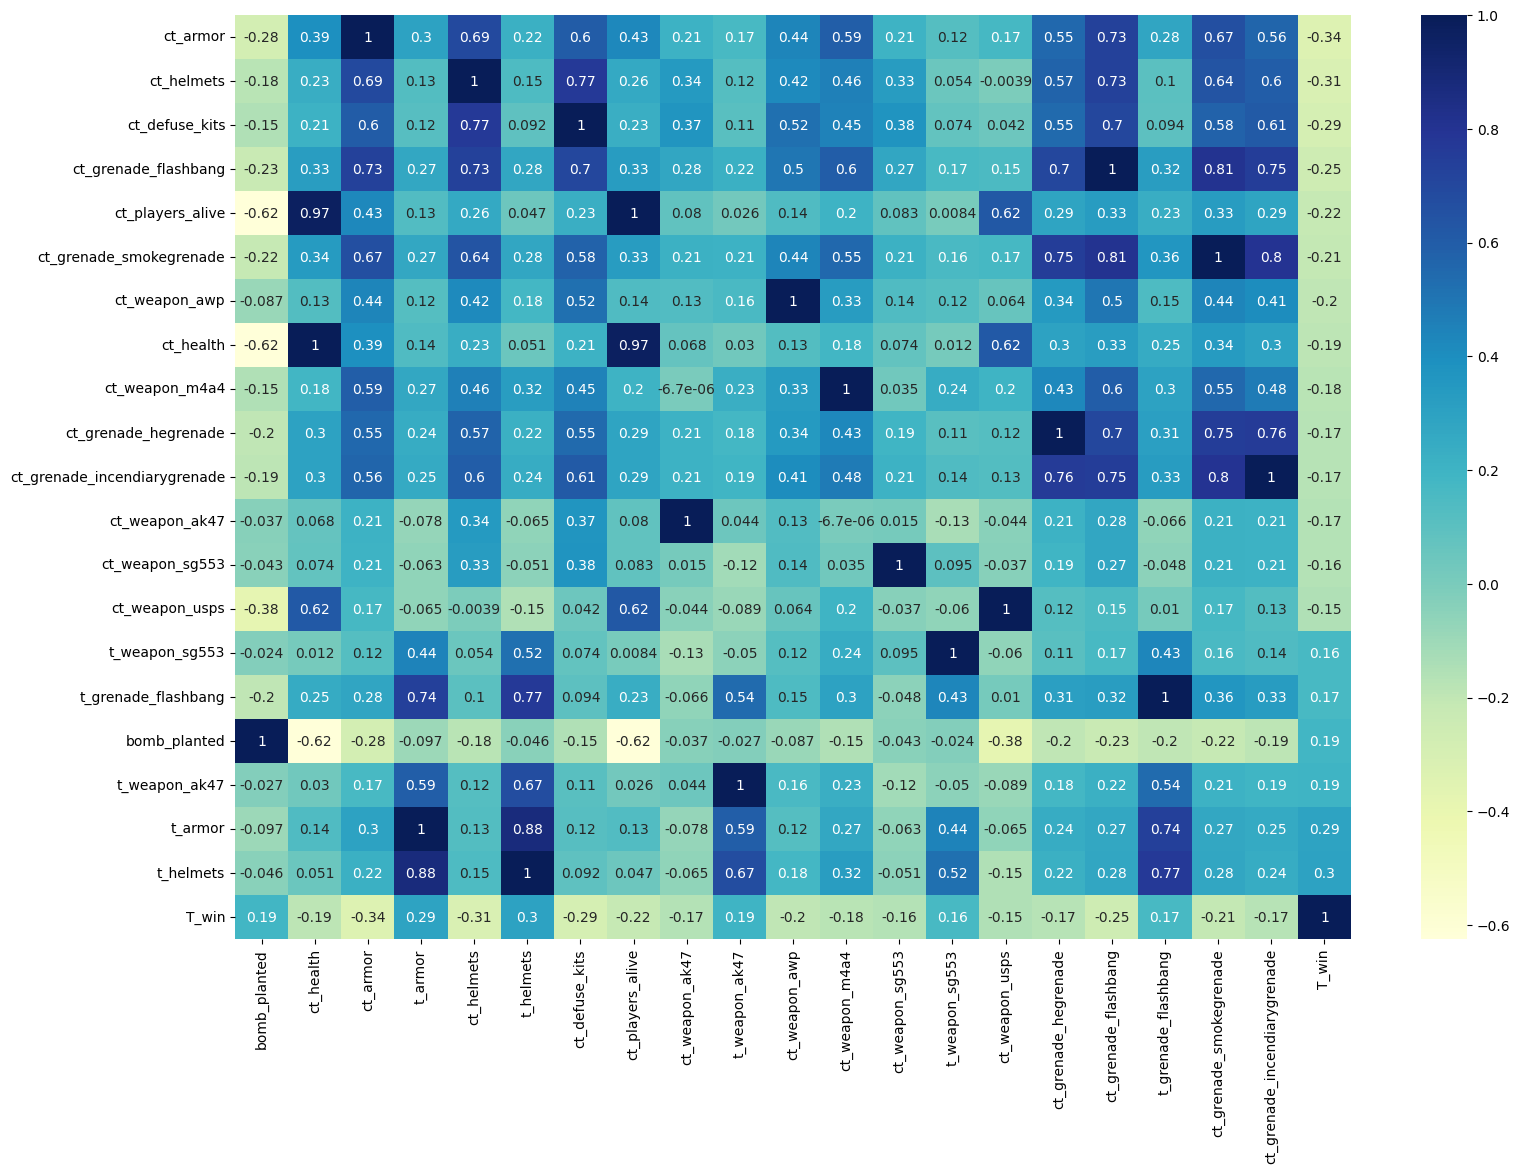

In [12]:
plt.figure(figsize=(18,12))
sns.heatmap(df_selected.corr().sort_values(by='T_win') ,annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>],
       [<Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Axes: title={'center': 'ct_grenade_incendiarygrenad

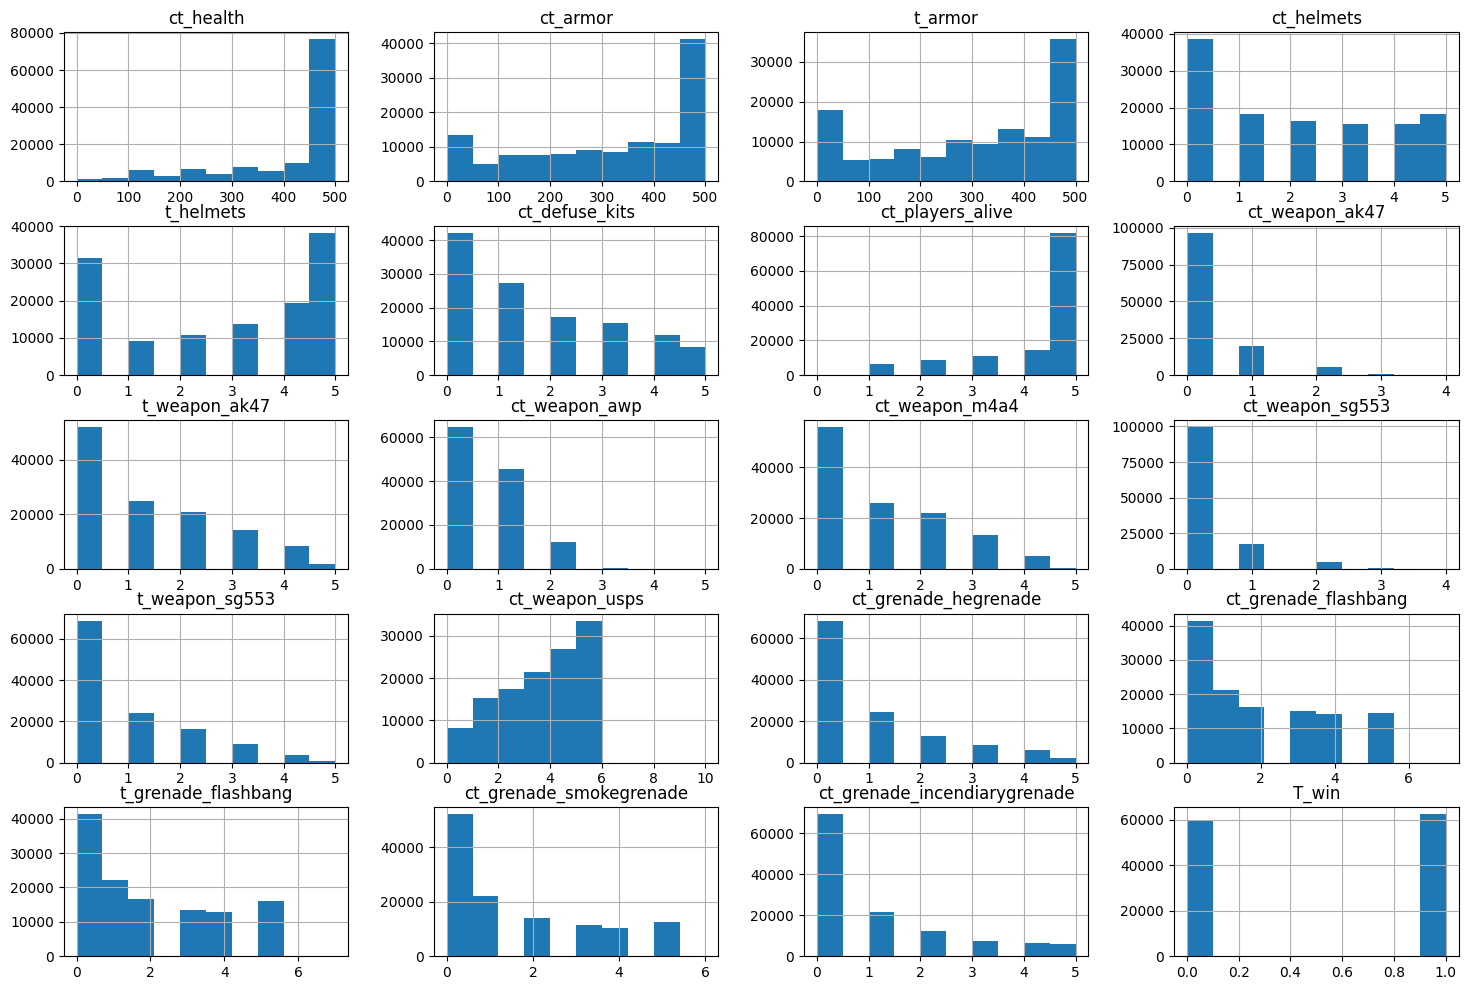

In [13]:
df_selected.hist(figsize=(18,12))

### Criando o modelo

In [14]:
from sklearn.model_selection import train_test_split

X, y = df_selected.drop(["T_win"], axis=1), df_selected["T_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
knn.score(X_test_scaled, y_test)

0.7643574871334041

In [17]:
from sklearn.model_selection  import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Melhores hiperparâmetros: ", grid_search.best_params_)

Melhores hiperparâmetros:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [18]:
from sklearn.metrics import accuracy_score

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste: ", accuracy)

Acurácia no conjunto de teste:  0.8027938893881219


In [19]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Melhores hiperparâmetros: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores hiperparâmetros:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [20]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste: ", accuracy)

Acurácia no conjunto de teste:  0.830814475941508


### Usando redes neurais

In [21]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [22]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)

model.fit(X_train_scaled_train, y_train_train, epochs=30,
          callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 [==============================] - 15s 4ms/step - loss: 0.4785 - accuracy: 0.7420 - val_loss: 0.4752 - val_accuracy: 0.7435
Epoch 2/30
2602/2602 [==============================] - 11s 4ms/step - loss: 0.4685 - accuracy: 0.7491 - val_loss: 0.4713 - val_accuracy: 0.7477
Epoch 3/30
2602/2602 [==============================] - 11s 4ms/step - loss: 0.4652 - accuracy: 0.7504 - val_loss: 0.4681 - val_accuracy: 0.7504
Epoch 4/30
2602/2602 [==============================] - 10s 4ms/step - loss: 0.4621 - accuracy: 0.7522 - val_loss: 0.4666 - val_accuracy: 0.7501
Epoch 5/30
2602/2602 [==============================] - 12s 4ms/step - loss: 0.4601 - accuracy: 0.7536 - val_loss: 0.4677 - val_accuracy: 0.7528
Epoch 6/30
2602/2602 [==============================] - 11s 4ms/step - loss: 0.4569 - accuracy: 0.7562 - val_loss: 0.4635 - val_accuracy: 0.7534
Epoch 7/30
2602/2602 [==============================] - 12s 5ms/step - loss: 0.4543 - accuracy: 0.7581 - val_loss: 0.4664 - val_ac

In [24]:
model.evaluate(X_test_scaled, y_test)

766/766 [==============================] - 2s 2ms/step - loss: 0.4694 - accuracy: 0.7469


[0.4694404900074005, 0.7468752264976501]

In [25]:
model.save("200_100_100_csgo.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Melhorando a rede neural

In [26]:
def build_model(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(X_train_scaled.shape[1],)))

    # Configurar a busca de hiperparâmetros para o número de neurônios em cada camada oculta
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation=hp.Choice('activation_' + str(i), ['relu', 'tanh'])
        ))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Configurar a busca de hiperparâmetros para o otimizador
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [27]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [28]:
from kerastuner.tuners import RandomSearch

# Configurar a busca em grade usando RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='helloworld'
)

# Realizar a busca
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)

tuner.search(X_train_scaled_train, y_train_train,
             epochs=30,
             validation_data=(X_valid, y_valid),
             callbacks=[early_stopping_cb])

Trial 10 Complete [00h 10m 32s]
val_accuracy: 0.755411833524704

Best val_accuracy So Far: 0.7576582729816437
Total elapsed time: 01h 19m 05s


In [29]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Melhores hiperparâmetros: {best_hps.values}")

# Treinar o modelo com os melhores hiperparâmetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled_train, y_train_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Acurácia no conjunto de teste: {accuracy}")

Melhores hiperparâmetros: {'num_layers': 2, 'units_0': 256, 'activation_0': 'relu', 'learning_rate': 0.001, 'units_1': 128, 'activation_1': 'tanh', 'units_2': 128, 'activation_2': 'relu'}
Epoch 1/20
2602/2602 [==============================] - 19s 7ms/step - loss: 0.4832 - accuracy: 0.7405 - val_loss: 0.4758 - val_accuracy: 0.7434
Epoch 2/20
2602/2602 [==============================] - 18s 7ms/step - loss: 0.4715 - accuracy: 0.7471 - val_loss: 0.4766 - val_accuracy: 0.7387
Epoch 3/20
2602/2602 [==============================] - 11s 4ms/step - loss: 0.4684 - accuracy: 0.7483 - val_loss: 0.4718 - val_accuracy: 0.7461
Epoch 4/20
2602/2602 [==============================] - 10s 4ms/step - loss: 0.4657 - accuracy: 0.7504 - val_loss: 0.4682 - val_accuracy: 0.7453
Epoch 5/20
2602/2602 [==============================] - 9s 4ms/step - loss: 0.4638 - accuracy: 0.7522 - val_loss: 0.4686 - val_accuracy: 0.7490
Epoch 6/20
2602/2602 [==============================] - 10s 4ms/step - loss: 0.4618 - ac